In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import skfuzzy as fuzz
from skfuzzy import control as ctrl
RAND_SEED = 2023

In [2]:
x1 = ctrl.Antecedent(np.linspace(-1.2, 0.6, 1000), 'position') # 1000 points between 0 to 1 inclusive
x2 = ctrl.Antecedent(np.linspace(-0.07, 0.07, 1000), 'velocity') # 1000 points between 0 to 1 inclusive
y = ctrl.Consequent(np.linspace(-1, 1, 1000), 'action') # 1000 points between 0.004 to 0.01 inclusive

c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


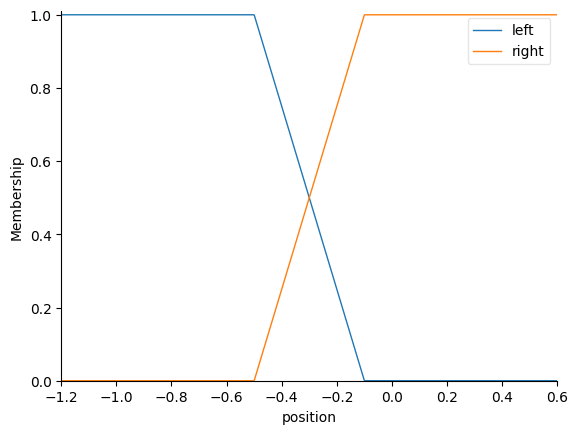

In [3]:
x1['left'] = fuzz.trapmf(x1.universe, [-1.2, -1.2, -0.5, -0.1]) # trapezoidal membership
x1['right'] = fuzz.trapmf(x1.universe, [-0.5, -0.1, 0.6, 0.6]) # trapezoidal membership

x1.view()

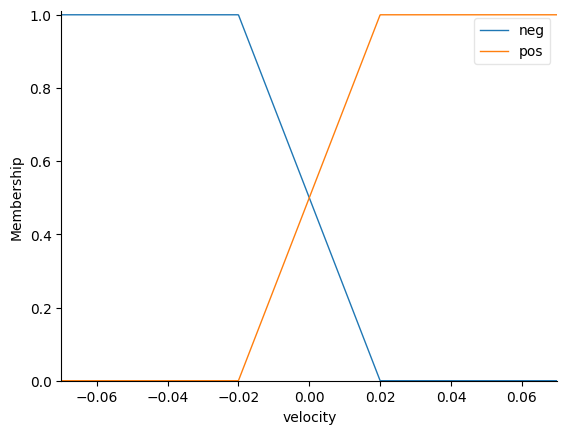

In [4]:
x2['neg'] = fuzz.trapmf(x2.universe, [-0.07, -0.07, -0.02, 0.02]) # trapezoidal membership
x2['pos'] = fuzz.trapmf(x2.universe, [-0.02, 0.02, 0.07, 0.07]) # trapezoidal membership

x2.view()

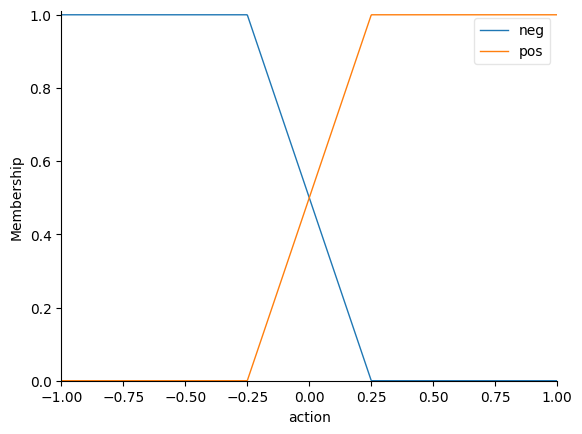

In [5]:
y['neg'] = fuzz.trapmf(y.universe, [-1, -1, -0.25, 0.25]) # trapezoidal membership
y['pos'] = fuzz.trapmf(y.universe, [-0.25, 0.25, 1, 1]) # trapezoidal membership

y.view()

In [6]:
list_rules = []
list_rules.append(ctrl.Rule(x1['left'] & x2['neg'], y['neg']))
list_rules.append(ctrl.Rule(x1['left'] & x2['pos'], y['pos']))
list_rules.append(ctrl.Rule(x1['right'] & x2['neg'], y['neg']))
list_rules.append(ctrl.Rule(x1['right']& x2['pos'], y['pos']))

In [7]:
car_ctrl = ctrl.ControlSystem(list_rules)
car = ctrl.ControlSystemSimulation(car_ctrl)

In [8]:
car.input['position'] = 0.65
car.input['velocity'] = 0.5
car.compute()
action = car.output["action"]
action

0.48958286333098594

In [9]:
def print_obs(obs, precision = 2):
    print(f'Position({round(obs[0], precision)}) | Velocity({round(obs[1], precision)})')
    
    
def run_simulation(max_steps = 500):
    ls_frames = []
    ls_obs = []
    ls_actions = []
    ls_rewards = []
    
    env = gym.make("MountainCarContinuous-v0")
    
    env.seed(RAND_SEED)
    np.random.seed(RAND_SEED)
    
    obs = env.reset()
    ls_obs.append(obs)
    
    ls_frames.append(env.render('rgb_array'))

    for i in range(max_steps):
        # action = 1 if i%2==0 else -1
        # action = -1
        # action = 1 if obs[0] < -0.21 else -1
        
        car.input['position'] = obs[0]
        car.input['velocity'] = obs[1]
        car.compute()
        a = car.output["action"]
        
        
        action = np.array([a])
        ls_actions.append(action)

        obs, reward, done, info = env.step(action)
        ls_obs.append(obs)
        ls_rewards.append(reward)

        ls_frames.append(env.render('rgb_array'))
        
        if done:
            break

    env.close()
    return ls_frames, ls_obs, ls_actions, ls_rewards, i

In [10]:
ls_frames, ls_obs, ls_actions, ls_rewards, steps= run_simulation()
print(f'Simulation Compeleted: Took {steps} steps')
print(f'Car Started from Position = {ls_obs[0][0]}')
print(f'Car Goal Position >= 0.45')
print(f'Car Reached Position = {ls_obs[-1][0]}')

Simulation Compeleted: Took 157 steps
Car Started from Position = -0.40813976049094425
Car Goal Position >= 0.45
Car Reached Position = 0.4573492319314634


Text(0.5, 1.0, 'Car Velocity Change')

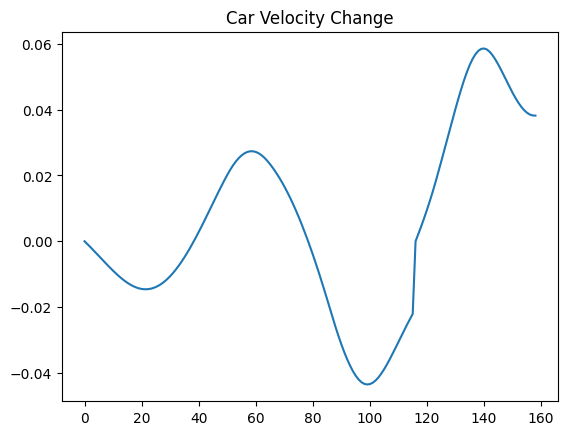

In [11]:
plt.plot([x[1] for x in ls_obs])
plt.title('Car Velocity Change')

Text(0.5, 1.0, 'Car Position Change')

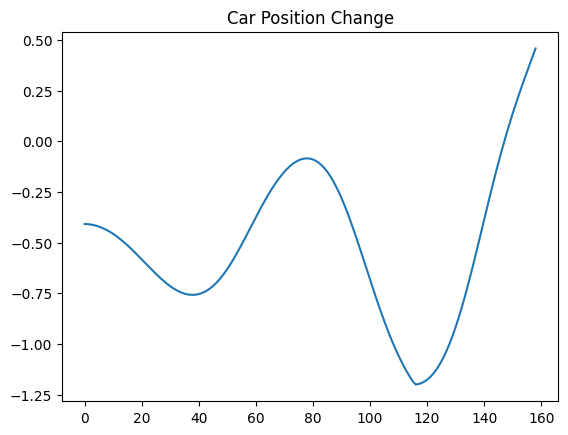

In [12]:
plt.plot([x[0] for x in ls_obs])
plt.title('Car Position Change')

Text(0.5, 1.0, 'Car Acceleration Change')

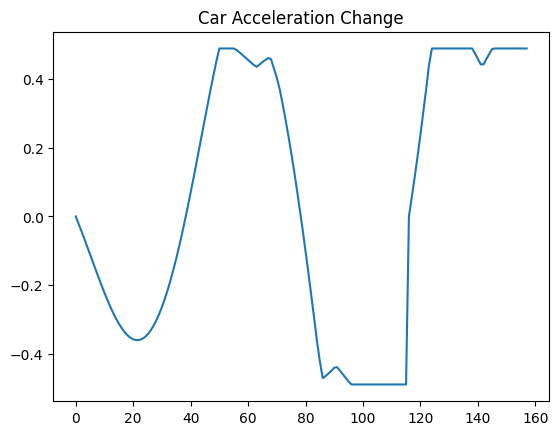

In [13]:
plt.plot(ls_actions)
plt.title('Car Acceleration Change')

Text(0.5, 1.0, 'Car Reward Change')

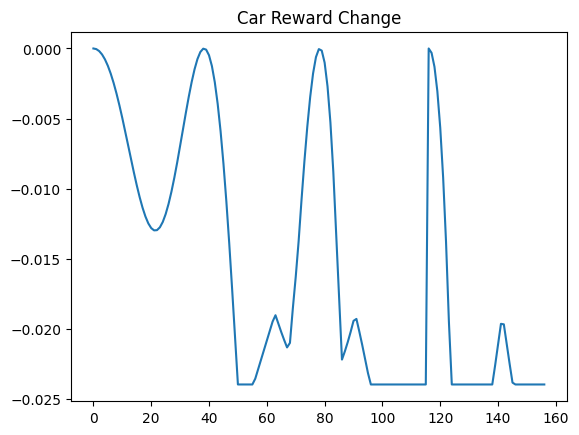

In [14]:
plt.plot(ls_rewards[:-1])
plt.title('Car Reward Change')

Generate GIF animation from env<br>
I used same animation generator as this article: https://jfking50.github.io/mountaincar/

In [15]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, filename, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    anim.save(filename)
    plt.close()
    return anim

In [16]:
plot_animation(ls_frames, 'Car_Fuzzy_Controller_Simulation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
